<a href="https://colab.research.google.com/github/facial09/GDL_code/blob/master/Basic_DL_modelipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from tensorflow.keras.utils import to_categorical
from keras.datasets import cifar10
from keras.models import Sequential,Model
from keras.layers import Flatten, Dense,Input

In [2]:
(x_train, y_train),(x_test,y_test) = cifar10.load_data() # cifar10 데이터셋에서 이미지 로드하기.

Num_Class = 10 # 10개의 레이블에 대해서 분류

170508288/170498071 [==============================] - 4s 0us/step


In [3]:
x_train = x_train.astype('float32') /255.0 # -1 ~ 1 사이 범위로 만들기 위해서 255.0으로 나누어줌. (이미지 데이터는 기본적은 256가지로 구성)
x_test = x_test.astype('float32') / 255.0

In [4]:
y_train # 단순 숫자로 표현되어 있음.

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [5]:
y_train = to_categorical(y_train,Num_Class) # 원 핫 인코딩을 통해 클래스 개수의 벡터로 표현
y_test = to_categorical(y_test,Num_Class)

In [6]:
y_train 

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
x_train[42,20,20,0] # 42번째 idx 사진의 (20,20)픽셀의 Red channel 값

0.49803922

##**모델 만들기 (API 함수 // Sequential)**

#### **Sequential** : 일렬로 층을 쌓는 네트워크를 빠르게 만들때 사용하기 좋음
#### => 분기가 없어 이전 층이 그대로 다음 층으로 연결됨.  

#### **함수형 API** : 다양한 형태의 네트워크를 유연성 있게 만들기에 적절함.
#### => 여기서는 단순한 형태이더라도 함수형 API를 이용하기를 권장함.

**Sequential model** 

In [8]:
model = Sequential([
Flatten(input_shape=(32,32,3)),
Dense(200, activation='relu'),
Dense(150, activation='relu'),
Dense(10, activation='softmax')
])


**API 함수**

In [9]:
input_layer = Input(shape =(32,32,3))

x = Flatten()(input_layer)

x = Dense(units = 200, activation = 'relu')(x)
x = Dense(units = 150, activation = 'relu')(x)

output_layer = Dense(units=10, activation = 'softmax')(x)

model_api = Model(input_layer,output_layer)

# **모델 확인하기**
## **Sequential**

In [10]:
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 200)               614600    
                                                                 
 dense_1 (Dense)             (None, 150)               30150     
                                                                 
 dense_2 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


## **API Function**

In [11]:
model_api.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_3 (Dense)             (None, 200)               614600    
                                                                 
 dense_4 (Dense)             (None, 150)               30150     
                                                                 
 dense_5 (Dense)             (None, 10)                1510      
                                                                 
Total params: 646,260
Trainable params: 646,260
Non-trainable params: 0
_________________________________________________________________


## **모델 컴파일**

In [12]:
from tensorflow.keras.optimizers import Adam

In [13]:
opt = Adam(lr = 0.0005)
model.compile(loss = 'categorical_crossentropy',optimizer = opt, metrics=['accuracy'])
model_api.compile(loss = 'categorical_crossentropy',optimizer = opt, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


## **모델 훈련**

In [14]:
model.fit(x_train,
          y_train,
          batch_size = 32,
          epochs = 10,
          shuffle = True)
# model_api.fit(x_train,
#           y_train,
#           batch_size = 32,
#           epochs = 10,
#           shuffle = True)

Epoch 1/10
1563/1563 [==============================] - 7s 3ms/step - loss: 1.8421 - accuracy: 0.3348
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.6705 - accuracy: 0.4002
Epoch 3/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5874 - accuracy: 0.4332
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5315 - accuracy: 0.4557
Epoch 5/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4960 - accuracy: 0.4665
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4625 - accuracy: 0.4771
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4330 - accuracy: 0.4888
Epoch 8/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4099 - accuracy: 0.4996
Epoch 9/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.3893 - accuracy: 0.5052
Epoch 10/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.368

## **모델예측***

In [15]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4692 - accuracy: 0.4770


[1.4692295789718628, 0.47699999809265137]

In [16]:
Class = np.array(['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck'])
preds = model.predict(x_test) # [10000,10]의 배열
preds_single = Class[np.argmax(preds, axis = -1)] # 하나의 예측 값으로 바꾸기, (예측한 값)
actual_single = Class[np.argmax(y_test,axis = -1)] # 실제 정답을 하나의 값으로 바꾸기 (실제 레이블링 된 값)

In [17]:
preds_single

array(['cat', 'automobile', 'ship', ..., 'dog', 'bird', 'horse'],
      dtype='<U10')

In [18]:
actual_single

array(['cat', 'ship', 'ship', ..., 'dog', 'automobile', 'horse'],
      dtype='<U10')

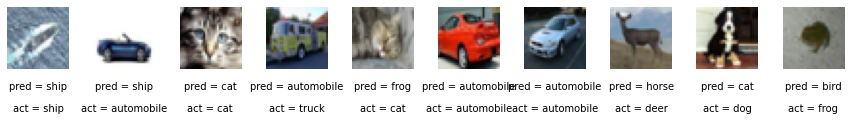

In [21]:
import matplotlib.pyplot as plt

n_to_show = 10
indices = np.random.choice(range(len(x_test)),n_to_show)

fig = plt.figure(figsize=(15,3))
fig.subplots_adjust(hspace = 0.4, wspace =0.4)

for i, idx in enumerate(indices):
  img = x_test[idx]
  ax = fig.add_subplot(1,n_to_show,i+1)
  ax.axis('off')
  ax.text(0.5,-0.35,'pred = '+str(preds_single[idx]), fontsize =10,ha='center',transform=ax.transAxes)
  ax.text(0.5,-0.7,'act = '+str(actual_single[idx]), fontsize = 10, ha='center',transform=ax.transAxes)
  ax.imshow(img)